# Practical 10 - Implementation of classification problem on MNIST dataset using MLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the images
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

In [3]:
model = keras.Sequential([
    layers.Input(shape=(28 * 28,)),           # Input layer
    layers.Dense(512, activation='relu'),      # First hidden layer with 512 neurons
    layers.BatchNormalization(),                # Batch normalization layer
    layers.Dropout(0.3),                       # Dropout layer to prevent overfitting
    layers.Dense(256, activation='relu'),      # Second hidden layer with 256 neurons
    layers.BatchNormalization(),                # Batch normalization layer
    layers.Dropout(0.3),                       # Dropout layer
    layers.Dense(128, activation='relu'),      # Third hidden layer with 128 neurons
    layers.BatchNormalization(),                # Batch normalization layer
    layers.Dropout(0.3),                       # Dropout layer
    layers.Dense(64, activation='relu'),       # Fourth hidden layer with 64 neurons
    layers.BatchNormalization(),                # Batch normalization layer
    layers.Dropout(0.3),                       # Dropout layer
    layers.Dense(10, activation='softmax')     # Output layer with softmax activation
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(X_train, y_train_encoded, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 13s 14ms/step - loss: 0.4519 - accuracy: 0.8632 - val_loss: 0.1658 - val_accuracy: 0.9485
Epoch 2/20
750/750 [==============================] - 10s 14ms/step - loss: 0.2170 - accuracy: 0.9366 - val_loss: 0.1124 - val_accuracy: 0.9681
Epoch 3/20
750/750 [==============================] - 10s 13ms/step - loss: 0.1706 - accuracy: 0.9511 - val_loss: 0.1073 - val_accuracy: 0.9689
Epoch 4/20
750/750 [==============================] - 10s 14ms/step - loss: 0.1428 - accuracy: 0.9588 - val_loss: 0.1051 - val_accuracy: 0.9702
Epoch 5/20
750/750 [==============================] - 9s 13ms/step - loss: 0.1289 - accuracy: 0.9628 - val_loss: 0.0902 - val_accuracy: 0.9736
Epoch 6/20
750/750 [==============================] - 10s 13ms/step - loss: 0.1197 - accuracy: 0.9648 - val_loss: 0.0883 - val_accuracy: 0.9752
Epoch 7/20
750/750 [==============================] - 10s 13ms/step - loss: 0.1052 - accuracy: 0.9687 - val_loss: 0.0815 - val_accuracy: 

In [6]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Step 7: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of MLP on MNIST Dataset: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


313/313 [==============================] - 1s 3ms/step
Accuracy of MLP on MNIST Dataset: 98.34%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Accuracy of MLP on MNIST Dataset: 98.34%


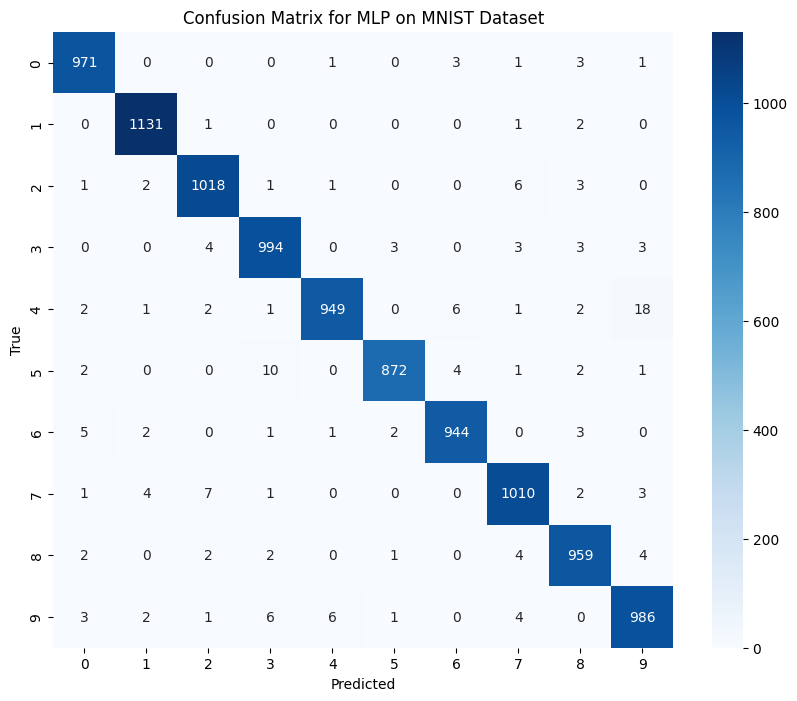

In [7]:
print(f"Accuracy of MLP on MNIST Dataset: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP on MNIST Dataset')
plt.show()